# **Project: TMDb Movie Data Analysis**

## **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# **Introduction**
## **Dataset Description**

The TMDb dataset contains information of about 10,000 movies collected from The Movie Database (TMDb).

This dataset contains 10,866 rows and 21 columns. The columns includes;

id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, and revenue_adj.

The budget and revenue columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time. The rest of the columns can be self explained.

# **Questions for Analysis**



**1. What is the total number of movies released every year?**

To get the total number of movies released every year, I will be grouping by the 'release_year' to count the total number of movies released each year which will be visualized using a line graph.

**2. In what year were the most movies released?**

Here, I will be visulaizing my result using a histogram to show the trend of movies released by the years.

**3. What are the Top 10 movies that made the highest profits?**

Firstly, I would have to calculate the profit made by each movie. To do this, I will be subtracting the revenue from the budget. I would then sort the profit in ascending order. Then i will be creating a bar chart of the 'original_title' against the 'profit'.

**4.   What are the 5 least rated movies?**

I would sort the 'vote_count' to refelct the least rated movies and I would be visualizing it using a bar chart of the 'original_title' against 'vote_count'.

**5. What actor acted the most movie?**

Here, I will have to split the 'cast' because they are in groups. I would be using the split function to split the cast. Then I would count the splitted cast to find the actor who acted the most movie.

**6. What is the change in revenue and budget over time?**

I will have to group the 'revenue' and 'budget' by the 'release_year' since we are trying to find the chnage over a period of time. Then I will find the sum and present the visual in a line graph.



In [3]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**

In this process, I will load in the data to check for cleanliness, and then trim and clean the dataset for analysis.

In [4]:
# First things first, I will be loading my data to see how the dataset looks like 

movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
movie_df.shape

# This is to for me to know the total number of rows and columns my daaset has

(10866, 21)

In [6]:
movie_df.info()

# This is for me to find out if I have any missing value, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
movie_df.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
movie_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [10]:
# This will enable me know how many duplicates I have in my dataset

sum(movie_df.duplicated())

1

In [11]:
movie_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool

In [12]:
# Selecting duplicate rows
# occurrence based on all columns

duplicate = movie_df[movie_df.duplicated(keep=False)]
duplicate

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [13]:
movie_df.drop_duplicates(inplace=True)
movie_df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [14]:
movie_df.shape

# Now, we can see that the duplicate has been removed

(10865, 21)

In [15]:
movie_df.info()

# we can see that we have some missing values
# I will then calculate the percentage of the missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

In [16]:
percent_missing = movie_df.isnull().sum() * 100 / len(movie_df)
missing_value_df = pd.DataFrame({'column_name' : movie_df.columns,'percent_missing':percent_missing,'type': movie_df.dtypes})
missing_value_df.sort_values(by='percent_missing', ascending = False)

# We can see that the homepage has the highest percentage of missing values of about 73%,
# while the production_companies has the least percentage of missing values

,column_name,percent_missing,type
homepage,homepage,72.977451,object
tagline,tagline,25.991717,object
keywords,keywords,13.741371,object
production_companies,production_companies,9.479982,object
cast,cast,0.699494,object
director,director,0.404970,object
genres,genres,0.211689,object
imdb_id,imdb_id,0.092039,object
overview,overview,0.036815,object
budget_adj,budget_adj,0.000000,float64


In [17]:
movie_df['production_companies'].value_counts()

# We can observe that Paramount Picures is the most common production company

Paramount Pictures                       156
Universal Pictures                       133
Warner Bros.                              84
Walt Disney Pictures                      76
Metro-Goldwyn-Mayer (MGM)                 72
                                        ... 
Lunch Box Entertainment                    1
Atitude ProduÃ§Ãµes e Empreendimentos      1
Mulmur Feed Company                        1
Chaotic Rampage American Pictures          1
Norm-Iris                                  1
Name: production_companies, Length: 7445, dtype: int64

In [18]:
pfreq = movie_df['production_companies'].value_counts().idxmax()

In [19]:
movie_df['genres'].value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [20]:
gfreq = movie_df['genres'].value_counts().idxmax()

In [21]:
movie_df['director'].value_counts()

Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: director, Length: 5067, dtype: int64

In [22]:
dfreq = movie_df['director'].value_counts().idxmax()

In [23]:
# Now, we wil replace the missing values by the frequent production company

movie_df["director"].replace(np.nan, dfreq, inplace=True)
movie_df["production_companies"].replace(np.nan, pfreq, inplace=True)

In [24]:
movie_df.dropna(subset=["genres"], axis=0, inplace = True)
movie_df['genres'].isnull().sum()

# Here, we dropped the rows whose 'genre' column is null

0

In [25]:
movie_df.fillna('unknown', inplace=True)
movie_df.isnull().sum().sum()

# We then filled all the missing rows with 'unknown' 

0

In [26]:
# We would be dropping irrelevant columns now

movie_df = movie_df.drop(['id', 'imdb_id', 'tagline', 'homepage', 'overview', 'keywords', 'revenue', 'budget'], axis = 1)

Here, I decided to remove these colums because I will not be using them in my analysis as they are not important. Also, I removed the revenue and budget columns because the final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [27]:
movie_df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# **Exploratory Data Analysis**
Now, it is time to explore my data after cleaning and trimming my dataset. 

We will be answering all the questions we will listed earlier in the report with relevant chart. 

In [28]:
# This will ennable us to find any abnormality in our data

movie_df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We can see that the average runtime for a movie in our dataset is 102, and the maximum is 900, but we have a minimum  runtime of zero which should not be. We can also see that have the minimum budget and revenue to also be zero.

In [29]:
# We want to list out all the rows that has a runtie of zero

movie_df[movie_df['runtime']==0]

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,0.097514,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,Paramount Pictures,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,0.218528,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,0.176744,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,0.028725,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,Paramount Pictures,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,0.026797,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,Paramount Pictures,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,0.135376,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,Woody Allen,0,Romance|Music|Comedy,Paramount Pictures,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,0.037459,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,0.036904,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


Now, we will be dropping these rows.

In [30]:
movie_df.drop(movie_df[movie_df.runtime==0].index, inplace=True)
movie_df.query('runtime==0').count().sum()

0

In [31]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10812 non-null  float64
 1   original_title        10812 non-null  object 
 2   cast                  10812 non-null  object 
 3   director              10812 non-null  object 
 4   runtime               10812 non-null  int64  
 5   genres                10812 non-null  object 
 6   production_companies  10812 non-null  object 
 7   release_date          10812 non-null  object 
 8   vote_count            10812 non-null  int64  
 9   vote_average          10812 non-null  float64
 10  release_year          10812 non-null  int64  
 11  budget_adj            10812 non-null  float64
 12  revenue_adj           10812 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.2+ MB


Now, I will be renaming my budget_adj and revenue_adj as new_budget and new_revenue respectively. I will also find the difference in the two colums to bring about the profit made on each movie.

In [32]:
movie_df.rename({'budget_adj':'new_budget', 'revenue_adj':'new_revenue'}, axis=1, inplace=True)
movie_df['profit']=movie_df['new_revenue']-movie_df['new_budget']

In [33]:
movie_df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,new_budget,new_revenue,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


# **Question 1: Total Number of Movies Released per Year**


Here, we would like to know the number of movies released per year.

,release_year
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42
1965,35
1966,46
1967,40
1968,39


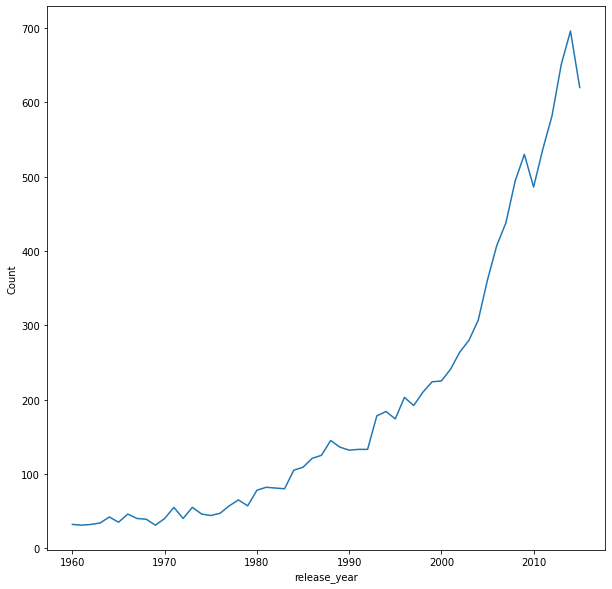

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
movie_df.groupby('release_year')['release_year'].count().plot(ax=ax).set_ylabel('Count')
movie_df.groupby(['release_year'])[['release_year']].count()

As we can see from the above chart, in the year 1960, less than 50 movies from the dataset were released. We can also see that the trend keeps increasing with time until 2010.

# **Question 2: What year were the most movies released?**

Here, we will be working with our release_year column.

Text(0, 0.5, 'Count')

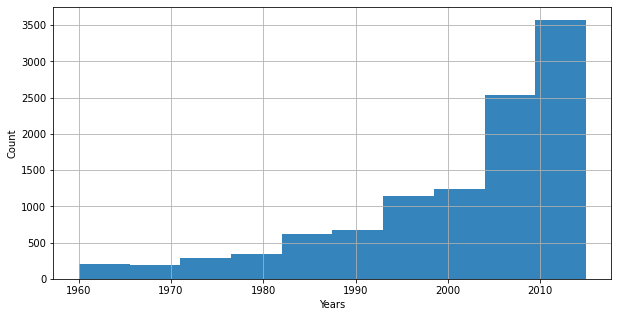

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
movie_df['release_year'].hist(alpha=0.9)
plt.xlabel('Years')
plt.ylabel('Count')

From our histogram above, we can see that the year 2010 was the year alot of movies were released having a figure of about 3600 movies.

# **Question 3: Top 10 Movies that made the Highest Profit?**

In [36]:
# movies with highest profit

highest_profit = movie_df.sort_values('profit',ascending=False).head(10)

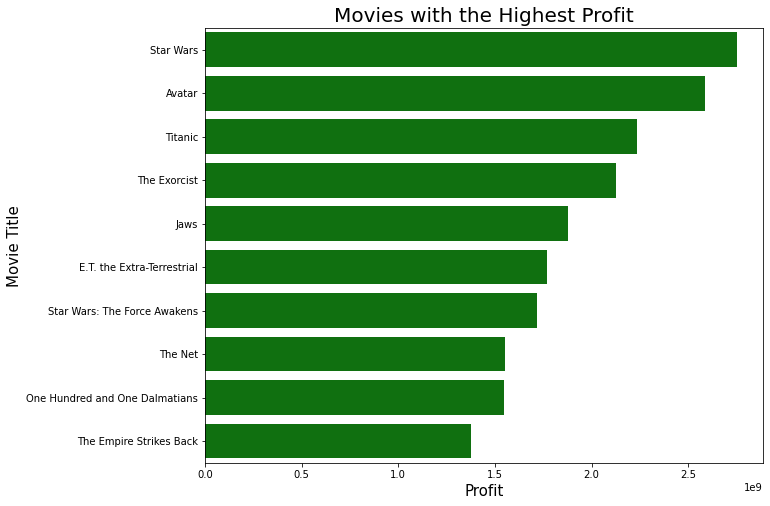

In [37]:
fig, ax = plt.subplots(figsize=(10,8)) 
b = sns.barplot(x = 'profit',y = 'original_title',data = highest_profit,ax=ax,color="green")
b.axes.set_title("Movies with the Highest Profit",fontsize=20)
b.set_xlabel("Profit",fontsize=15)
b.set_ylabel("Movie Title",fontsize=15)
b.tick_params(labelsize=10)
plt.show()

From the above chart, Star Wars made the highest budget.

# **Question 4: What are the 5 Least Rated Movies?**

In [38]:
least_rated = movie_df.sort_values('vote_count', ascending = True).head(5)

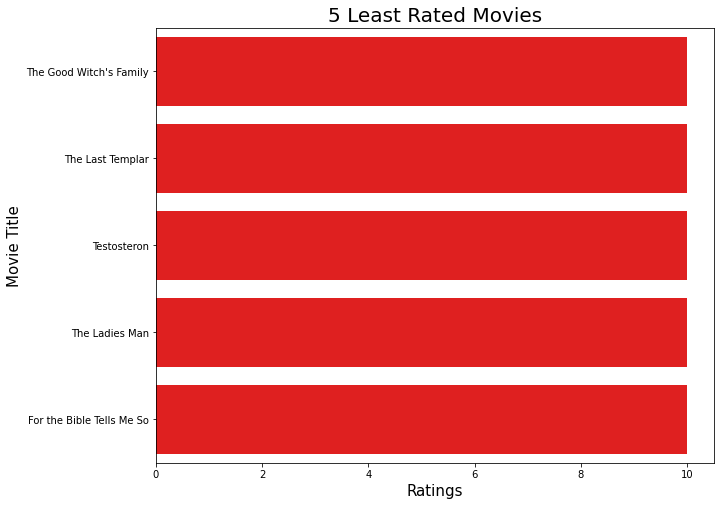

In [39]:
fig, ax = plt.subplots(figsize=(10,8)) 
b = sns.barplot(x = 'vote_count',y = 'original_title',data = least_rated, ax=ax, color='Red')
b.axes.set_title("5 Least Rated Movies",fontsize=20)
b.set_xlabel("Ratings",fontsize=15)
b.set_ylabel("Movie Title",fontsize=15)
b.tick_params(labelsize=10)
plt.show()

From the above chart, we can see the least five rated movies. They all have the same ratings.

# **Question 5: What Actor acted the Most Movie?**






In [40]:
# Here, we are going to split the cast. This will enable us to know the cast who acted the most movies

actor = movie_df
actor = actor.assign(cast = actor.cast.str.split('|')).explode('cast')
actor.head(10)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,new_budget,new_revenue,profit
0,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,32.985763,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,28.419936,Mad Max: Fury Road,Charlize Theron,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,28.419936,Mad Max: Fury Road,Hugh Keays-Byrne,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,28.419936,Mad Max: Fury Road,Nicholas Hoult,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,28.419936,Mad Max: Fury Road,Josh Helman,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08


In [41]:
actor.cast.value_counts()

unknown               75
Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
                      ..
David Kaufman          1
James Balog            1
Svavar Jonatansson     1
Adam LeWinter          1
Stephanie Nielson      1
Name: cast, Length: 18925, dtype: int64

The data above indicates that we have about 75 unknown cast. This is as a result of our data cleamimg (data wrangling) where we replaced all the missing values with 'Unknown'. 

Hence, **The actor that acted the most movie is ROBERT DE NIRO**

# **Question 6: What is the Change in Revenue and Budget over the Year?**

,new_revenue,new_budget
release_year,,
1960,1.069117e+09,1.626252e+08
1961,2.463622e+09,3.365630e+08
1962,1.553996e+09,3.944616e+08
1963,1.334357e+09,5.221334e+08
1964,2.397193e+09,2.775772e+08
1965,3.170185e+09,4.858590e+08
1966,5.692623e+08,3.866540e+08
1967,4.823051e+09,6.579397e+08
1968,1.659601e+09,4.509830e+08


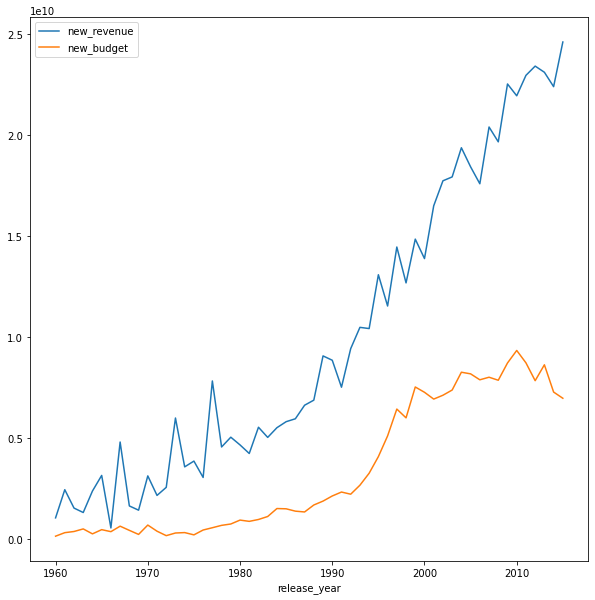

In [62]:
fig, ax = plt.subplots(figsize=(10,10)) 
movie_df.groupby('release_year')[['new_revenue','new_budget']].sum().plot(ax=ax)
movie_df.groupby(['release_year'])[['new_revenue','new_budget']].sum()

From the above line graph, we can deduce that the revenue per movie is greater than the budget. 

# **Conclusions**

In conclusion, after processing the data, we can conclude that:



1.   **The total number of movies released since 1960 increase by the year.**
2.   **The most movies were released in the year 2010.**
3.   **Star wars movie made the highest profit.**
4.   **The 5 least rated movies have the same ratings.**
5.   **ROBERT DE NIRO was the actor who acted the most movie.**
6.   **The revenue made from the movies were greater than the budget.**

# **Limitations**

As can see from data processed above, about 52 % of the budget data is zero. This would have affected the profit calculation greatly and therefore is a big limitation. 

During the data wrangling, we cleaned (removed) empty rows which could have affected the integrity of the data as well as analysis of the data especially in the area of the highest profited movie.